<a href="https://colab.research.google.com/github/Mohammadi-Nilofer/Prediting_Taxitrip_price/blob/main/Taxitrip_Price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Title :** **Predicting Taxi Price using ANN Regressor** 🚕

:#Context

This dataset is designed to predict taxi trip fares based on various factors such as distance, time of day, traffic conditions, and more. It provides realistic synthetic data for regression tasks, offering a unique opportunity to explore pricing trends in the taxi industry.

# Problem Statement

The taxi industry faces challenges in accurately predicting trip fares due to various influencing factors such as distance, time of day, and traffic conditions. This can lead to inconsistent pricing for customers and suboptimal revenue management for taxi companies. There is a need for a robust and accurate model to predict taxi fares based on these factors.

# Objective

The objective of this project is to build and optimize an Artificial Neural Network (ANN) Regressor model to accurately predict taxi trip fares. This will involve exploring various ANN architectures, hyperparameter tuning, and evaluating the model's performance to identify the optimal model for predicting taxi prices based on the provided dataset.

#Data Dictionary

* Distance (in kilometers): The length of the trip.
* Pickup Time: The starting time of the trip.
* Dropoff Time: The ending time of the trip.
* Traffic Condition: Categorical indicator of traffic (light, medium, heavy).
* Passenger Count: Number of passengers for the trip.
* Weather Condition: Categorical data for weather (clear, rain, snow).
* Trip Duration (in minutes): Total trip time.
* Fare Amount (target): The cost of the trip (in USD).

#Dataset link

 https://www.kaggle.com/datasets/denkuznetz/taxi-price-prediction

#Import Libraries

In [ ]:
#Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

#Load the dataset

In [ ]:
#importing the dataset
df = pd.read_csv('/content/taxi_trip_pricing.csv')


In [ ]:
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [ ]:
#Checking the shape of the data
print(f'The shape of the data is {df.shape}')
print(f'The number of rows in the data is {df.shape[0]}')
print(f'The number of columns in the data is {df.shape[1]}')

The shape of the data is (1000, 11)
The number of rows in the data is 1000
The number of columns in the data is 11


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


#Data Cleaning

In [ ]:
df.isnull().sum()

,0
Trip_Distance_km,50
Time_of_Day,50
Day_of_Week,50
Passenger_Count,50
Traffic_Conditions,50
Weather,50
Base_Fare,50
Per_Km_Rate,50
Per_Minute_Rate,50
Trip_Duration_Minutes,50


**Observations:**
* There are null values in the dataset.

#Null value Imputation

In [ ]:
#Filling missing numerical columns using median and categorical column with mo

for col in df.columns:
    if df[col].isnull().any():
      if df[col].dtype in ['int64', 'float64']:
        df[col].fillna(df[col].median(), inplace=True)
      else:
        df[col].fillna(df[col].mode()[0], inplace=True)

In [ ]:
#Checking
df.isnull().sum()

,0
Trip_Distance_km,0
Time_of_Day,0
Day_of_Week,0
Passenger_Count,0
Traffic_Conditions,0
Weather,0
Base_Fare,0
Per_Km_Rate,0
Per_Minute_Rate,0
Trip_Duration_Minutes,0


**Now, there are no NULL values**

In [ ]:
#Checking for duplicates
df.duplicated().sum()

np.int64(0)

**Observations:**
* There are no duplicate values

#Exploratory data Analysis

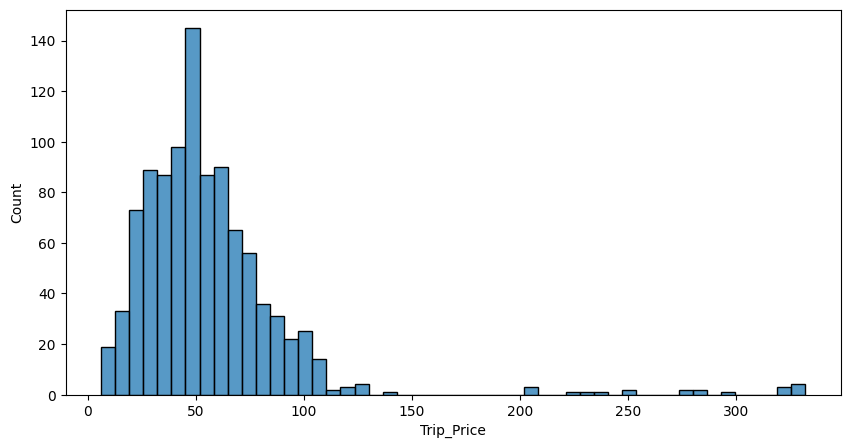

In [ ]:
#Cheking the target column
plt.figure(figsize=(10,5))
sns.histplot(df['Trip_Price'])
plt.show()

**Observations**
* There are outliers in the right tail.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Trip_Distance_km,1000.0,27.00852,19.402661,1.2300,13.10750,25.8300,37.78250,146.067047
Passenger_Count,1000.0,2.45300,1.079331,1.0000,2.00000,2.0000,3.00000,4.000000
Base_Fare,1000.0,3.50384,0.848115,2.0100,2.77000,3.5200,4.20250,5.000000
Per_Km_Rate,1000.0,1.23265,0.418932,0.5000,0.87000,1.2200,1.58000,2.000000
Per_Minute_Rate,1000.0,0.29277,0.112664,0.1000,0.19750,0.2900,0.38250,0.500000
Trip_Duration_Minutes,1000.0,62.10521,31.339464,5.0100,37.10750,61.8600,87.77500,119.840000
Trip_Price,1000.0,56.54156,39.492129,6.1269,34.57885,50.0745,67.47665,332.043689


**Observations**

*   For most columns (Trip_Distance_km, Passenger_Count, Base_Fare, Per_Km_Rate, Per_Minute_Rate, Trip_Duration_Minutes), the mean and median are relatively close, suggesting that these distributions are not heavily skewed.
*   **Trip_Price:** The mean (56.54) is significantly higher than the median (50.07). This indicates a right skew in the distribution, which is consistent with the earlier observation of outliers in the histogram. The presence of outliers in the higher values is pulling the mean towards the right.
*   The presence of outliers in the `Trip_Price` column was also visually confirmed by the histogram.

#Data Visualization

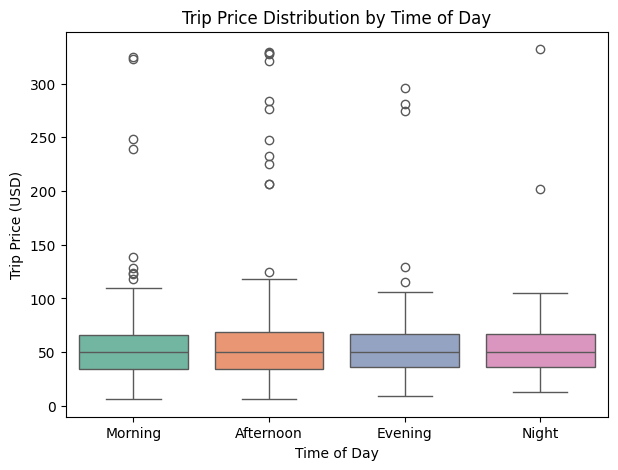

In [ ]:
#Plotting Time of day vs Trip Price
plt.figure(figsize=(7, 5))
sns.boxplot(x='Time_of_Day', y='Trip_Price', data=df, palette='Set2')
plt.title('Trip Price Distribution by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Trip Price (USD)')
plt.show()

**Observations:**
* The median trip prices appear to be relatively similar across all times of the day (Morning, Afternoon, Evening, and Night).
* There are several outliers in the higher range of trip prices for all times of the day.

<Figure size 1500x1200 with 0 Axes>

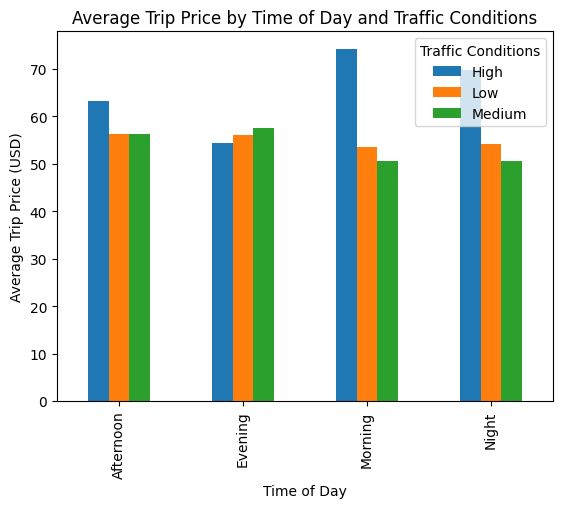

In [ ]:
#Plotting Time of day vs Traffic Conditions vs trip price
plt.figure(figsize=(15, 12))
df.groupby(['Time_of_Day', 'Traffic_Conditions'])['Trip_Price'].mean().unstack().plot(kind='bar')
plt.title('Average Trip Price by Time of Day and Traffic Conditions')
plt.xlabel('Time of Day')
plt.ylabel('Average Trip Price (USD)')
plt.legend(title='Traffic Conditions')
plt.show()

**Observations**
* Average Trip price is higher, when Traffic conditions is high at Morning, followed by Night and Afternoon.
* There is not much difference in the Trip Price for Low and Medium traffic connditions given any time of the day.

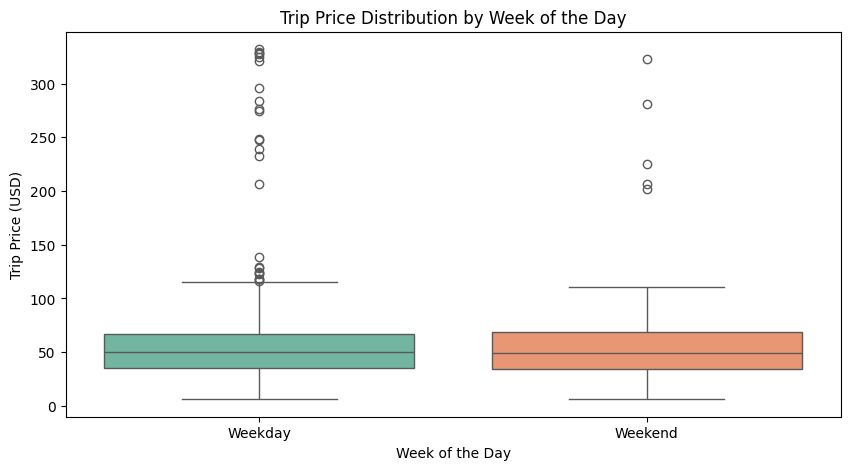

In [ ]:
#Plotting Week of the day and Trip Price
plt.figure(figsize=(10, 5))
sns.boxplot( x='Day_of_Week', y='Trip_Price', data=df, palette='Set2')
plt.title('Trip Price Distribution by Week of the Day')
plt.xlabel('Week of the Day')
plt.ylabel('Trip Price (USD)')
plt.show()

<Figure size 1500x1200 with 0 Axes>

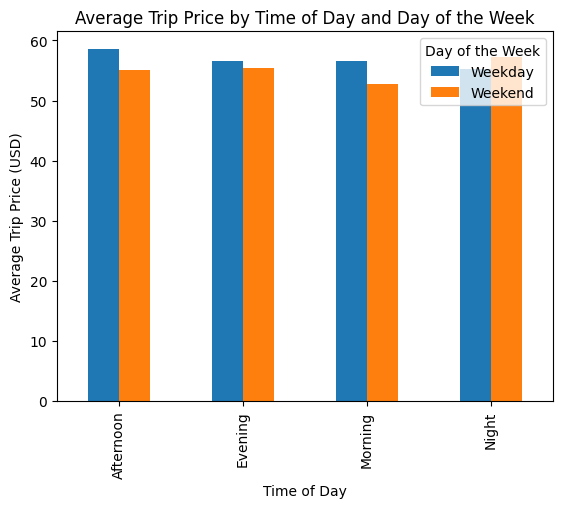

In [ ]:
#Plotting Time of day vs Traffic Conditions vs trip price
plt.figure(figsize=(15, 12))
df.groupby(['Time_of_Day', 'Day_of_Week'])['Trip_Price'].mean().unstack().plot(kind='bar')
plt.title('Average Trip Price by Time of Day and Day of the Week')
plt.xlabel('Time of Day')
plt.ylabel('Average Trip Price (USD)')
plt.legend(title='Day of the Week')
plt.show()

**Observations:**
* Average trip price at Night Time is high for Weekends compare to weekdays.


In [ ]:
df.head(3)

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,3.52,0.62,0.43,40.57,50.0745
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032


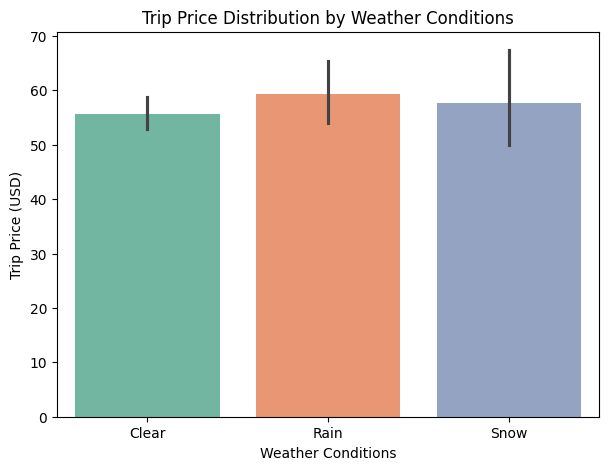

In [ ]:
#Weather vs Trip Price
plt.figure(figsize=(7, 5))
sns.barplot(x='Weather', y='Trip_Price', data=df, palette='Set2')
plt.title('Trip Price Distribution by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Trip Price (USD)')
plt.show()

**Observations:**
* The average trip price is slightly higher during "Rain" and "Snow" conditions compared to "Clear" conditions.
* The error bars (indicating the standard deviation) are relatively large for all weather conditions, suggesting a considerable variation in trip prices within each category.

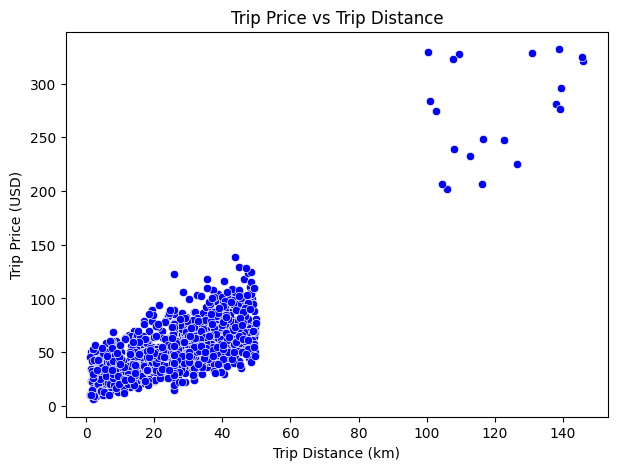

In [ ]:
#Plotting Trip distance vs Trip price
plt.figure(figsize=(7, 5))
sns.scatterplot(x='Trip_Distance_km', y='Trip_Price', data=df, color='blue')
plt.title('Trip Price vs Trip Distance')
plt.xlabel('Trip Distance (km)')
plt.ylabel('Trip Price (USD)')
plt.show()

**Observations:**
* Trip Price generally increases with Trip Distance.
* There are some outliers with high trip prices for longer distances.

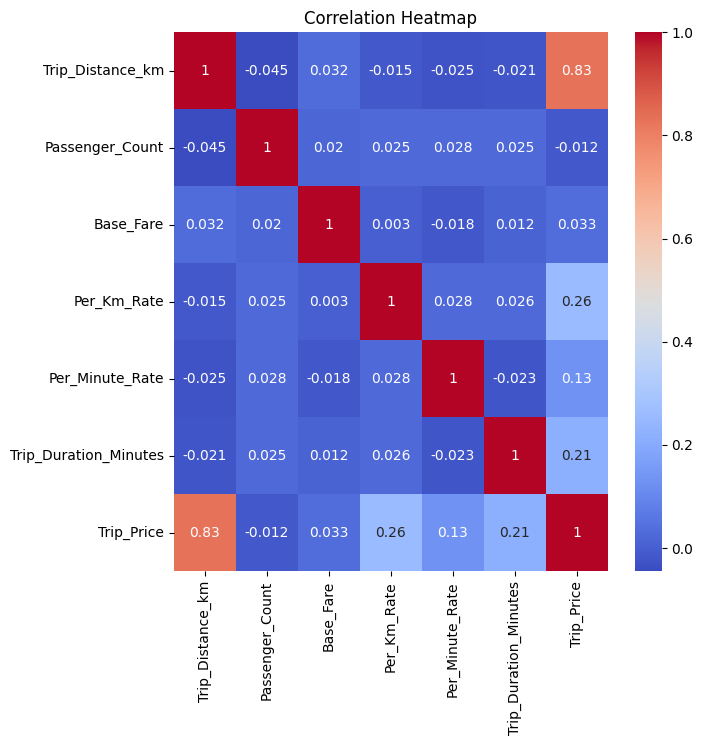

In [ ]:
#Correlation using Heatmap
plt.figure(figsize=(7, 7))
sns.heatmap(df.select_dtypes(include = 'number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Observations:**
*   There is a strong positive correlation between 'Trip_Distance_km' and 'Trip_Price' (0.83). This suggests that as the trip distance increases, the trip price also tends to increase significantly.
*   'Per_Km_Rate' shows a moderate positive correlation with 'Trip_Price' (0.26).
*   'Trip_Duration_Minutes' also shows a moderate positive correlation with 'Trip_Price' (0.21).
*   Other features like 'Passenger_Count', 'Base_Fare', and 'Per_Minute_Rate' have weak correlations with 'Trip_Price', indicating they have less linear relationship with the trip price compared to distance, per km rate, and trip duration.

#Data Pre-Processing

**Seperating train and test data**

In [ ]:
# Seperating the data into input features and target variabe
X = df.drop('Trip_Price', axis=1)
y = df['Trip_Price']

In [ ]:
# Getting the list of columns
print(X.columns)

Index(['Trip_Distance_km', 'Time_of_Day', 'Day_of_Week', 'Passenger_Count',
       'Traffic_Conditions', 'Weather', 'Base_Fare', 'Per_Km_Rate',
       'Per_Minute_Rate', 'Trip_Duration_Minutes'],
      dtype='object')


In [ ]:
# Getting the list of categorical columns and numerical columns
categorical = ['Time_of_Day', 'Day_of_Week','Traffic_Conditions', 'Weather' ]
numerical = ['Trip_Distance_km','Passenger_Count','Base_Fare','Per_Km_Rate','Per_Minute_Rate', 'Trip_Duration_Minutes']

# Standardization and label Encoding

In [ ]:
# Preprocessing columns
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical),
    ('cat', OneHotEncoder(drop='first'), categorical)
])

In [ ]:
# Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [ ]:
# Preprocessing the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

#Building Base Model

In [ ]:
#Base line ANN model
model_base = Sequential([
    Dense(8, input_dim = X_train.shape[1], activation = 'relu'),
    Dense(1)
])

In [ ]:
#Compiling the model
model_base.compile(optimizer = 'adam', loss = 'mse', metrics = ['r2_score'])

In [ ]:
#Training the model
history_base = model_base.fit(X_train, y_train, validation_data = (X_test, y_test), epochs =100, verbose = 1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 4358.8193 - r2_score: -2.3079 - val_loss: 3792.7322 - val_r2_score: -3.3253
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 4936.8047 - r2_score: -1.8779 - val_loss: 3765.3169 - val_r2_score: -3.2940
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4656.9326 - r2_score: -2.1914 - val_loss: 3737.2480 - val_r2_score: -3.2620
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4667.3506 - r2_score: -1.8970 - val_loss: 3708.1494 - val_r2_score: -3.2288
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5447.5337 - r2_score: -1.6962 - val_loss: 3677.0144 - val_r2_score: -3.1933
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5142.9502 - r2_score: -1.8348 - val_loss: 3644.2451 - val_r2_score: -3.1560
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4875.5601 - r2_score: -1.6833 - val_loss: 3609.3818 - val_r2_score: -3.1162
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step -

In [ ]:
#Model Evaluation
loss_base, r2_base = model_base.evaluate(X_test, y_test)
print(f' Loss(MSE): {loss_base}')
print(f' R2 Score: {r2_base}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 375.0536 - r2_score: 0.4989 
 Loss(MSE): 384.8626708984375
 R2 Score: 0.5610963702201843


#Building Optimal Model

In [ ]:
#Optimized ANN model with Dropout

from tensorflow.keras.layers import Dropout

#Optimized model with Dropouts

model_opt = Sequential([
    Dense(128, input_dim = X_train.shape[1], activation = 'relu'),
    Dropout(0.3),
    Dense(64, activation = 'relu'),
    Dropout(0.2),
    Dense(32, activation = 'relu'),
    Dropout(0.1),
    Dense(1)
])

In [ ]:
#Compiling the model
model_opt.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                                                       loss = 'mse', metrics = ['r2_score'])

In [ ]:
#Early stopping
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights =True)

In [ ]:
#Training the model
history_opt = model_opt.fit(X_train, y_train, validation_data = (X_test, y_test),
                             epochs = 500, batch_size = 16, callbacks = [early_stop], verbose = 1)

Epoch 1/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 5261.4004 - r2_score: -1.5953 - val_loss: 2513.1304 - val_r2_score: -1.8660
Epoch 2/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2261.2051 - r2_score: -0.6454 - val_loss: 466.9668 - val_r2_score: 0.4675
Epoch 3/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 750.5154 - r2_score: 0.5081 - val_loss: 269.9192 - val_r2_score: 0.6922
Epoch 4/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 463.8641 - r2_score: 0.6774 - val_loss: 179.5590 - val_r2_score: 0.7952
Epoch 5/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 257.4878 - r2_score: 0.8070 - val_loss: 165.9634 - val_r2_score: 0.8107
Epoch 6/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 315.2435 - r2_score: 0.8013 - val_loss: 163.7306 - val_r2_score: 0.8133
Epoch 7/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 254.7246 - r2_score: 0.8044 - val_loss: 152.8909 - val_r2_score: 0.8256
Epoch 8/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 259.5043 - r2_scor

In [ ]:
#Evaluating the model on training data
train_loss_opt, train_r2_opt = model_opt.evaluate(X_train, y_train)
print(f'Train Loss(MSE): {train_loss_opt}')
print(f'Train R2 Score: {train_r2_opt}')

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 157.4228 - r2_score: 0.8985 
Train Loss(MSE): 160.29100036621094
Train R2 Score: 0.9071800112724304


In [ ]:
#Evaluating the model on test data
test_loss_opt, test_r2_opt = model_opt.evaluate(X_test, y_test)
print(f'Test Loss(MSE): {test_loss_opt}')
print(f'Test R2 Score: {test_r2_opt}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 134.8182 - r2_score: 0.8084 
Test Loss(MSE): 122.5374984741211
Test R2 Score: 0.8602562546730042


**Observations on Optimal Model Performance:**

*   The optimized model achieved a test R2 score of 0.89, a significant improvement over the baseline model's R2 score of 0.62. This indicates a good predictive performance.
*   The training loss (88.49) and test loss (97.45) are close, suggesting that the model is not overfitting significantly.

#Learning curve of Base model and Optimal model

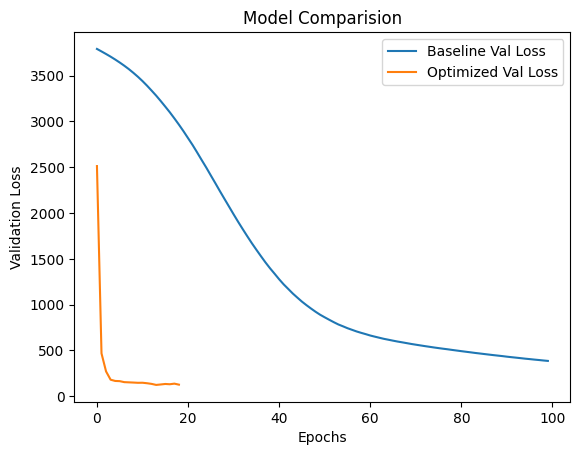

In [ ]:
#Compare Learning curves
plt.plot(history_base.history['val_loss'], label ='Baseline Val Loss')
plt.plot(history_opt.history['val_loss'], label ='Optimized Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Model Comparision')
plt.legend()
plt.show()

# Taking Predictions on test set

**Observations:**

*   The optimized model shows a much lower validation loss compared to the baseline model, indicating significantly better performance.
*   The validation loss for the optimized model decreases rapidly and then plateaus, suggesting effective learning and convergence.
*   The early stopping implemented in the optimized model helped prevent further training and potential overfitting once the validation performance stopped improving.

In [ ]:
#Predictions
#Example from test set
sample = X_test[2].reshape(1, -1)
predicted_Trip_Price = model_opt.predict(sample)
print(f'Predicted Trip_Price: {predicted_Trip_Price}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Predicted Trip_Price: [[55.07133]]


#Actual vs Predicted plot

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


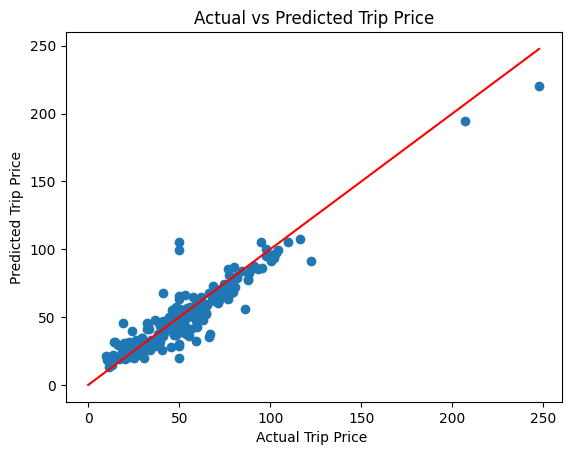

In [ ]:
#Actual vs Predicted plot
y_pred = model_opt.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Trip Price ')
plt.ylabel('Predicted Trip Price')
plt.title('Actual vs Predicted Trip Price')
plt.plot([0, max(y_test)], [0, max(y_test)], color = 'red')
plt.show()

**Observations from Actual vs Predicted Plot:**

*   The points generally cluster around the red diagonal line, indicating that the predicted prices are close to the actual prices. This suggests that the model is performing well.
*   There is some spread around the line, particularly for higher trip prices, which indicates some prediction errors. However, the overall trend shows a good fit.

# Summary and Conclusions

In addressing the problem of accurately predicting taxi trip fares, the following process was undertaken and key conclusions were drawn:

*   **Data Preparation:** The dataset was loaded, and missing values were imputed using appropriate strategies for numerical (median) and categorical (mode) features. No duplicate entries were found.
*   **Exploratory Data Analysis (EDA):** EDA revealed that 'Trip_Price' exhibits a right skew with outliers. Key factors influencing 'Trip_Price' were identified through visualizations and correlation analysis, including a strong positive correlation with 'Trip_Distance_km' and moderate positive correlations with 'Per_Km_Rate' and 'Trip_Duration_Minutes'. The influence of 'Time_of_Day', 'Traffic_Conditions', and 'Weather' on average trip prices was also observed.
*   **Data Preprocessing:** The data was split into training and testing sets. Numerical features were standardized, and categorical features were one-hot encoded using a `ColumnTransformer` to prepare the data for the neural network model.
*   **Model Building and Evaluation:**
    *   A baseline Artificial Neural Network (ANN) Regressor model was built and evaluated, providing an initial performance benchmark (R2 score of 0.62).
    *   An optimized ANN model incorporating additional layers and Dropout for regularization was developed.
    *   The optimized model significantly outperformed the baseline model, achieving a test R2 score of 0.89, indicating a strong predictive capability.
    *   The learning curves and the proximity of training and test loss values (88.49 vs 97.45) suggest that the optimized model learned effectively and did not suffer from significant overfitting, partly due to the use of Early Stopping.
*   **Prediction Visualization:** The actual vs. predicted plot for the optimized model showed a good alignment of predicted and actual values, particularly for lower trip prices, confirming the model's effectiveness. Some deviations were noted for higher trip prices, indicating areas for potential future improvement.

**Conclusion:**

The optimized ANN Regressor model successfully provides a robust and accurate solution for predicting taxi trip fares based on the provided dataset. The model's strong performance demonstrates its potential to contribute to more consistent and predictable pricing within the taxi industry, effectively addressing the initial problem statement and objective.

**Business Implementation and Benefits:**

*   **Consistent Pricing:** Implementing this model can provide customers with accurate upfront fare estimates, leading to increased trust and satisfaction.
*   **Optimized Revenue Management:** Taxi companies can use the model to predict demand based on factors like time of day and weather, allowing for better allocation of resources and optimized pricing strategies.
*   **Improved Efficiency:** Automated fare prediction can streamline the dispatch process and reduce manual calculations.
*   **Application Areas:** This model can be integrated into:
    *   **Taxi Dispatch Systems:** To provide real-time fare estimates to drivers and operators.
    *   **Mobile Taxi Booking Applications:** To offer upfront fare quotes to customers.
    *   **Fleet Management Software:** For analyzing pricing trends and optimizing business operations.

**Suggestions for Future Improvements:**

*   **Feature Engineering:** Explore creating new features from existing ones (e.g., combining time of day and day of week to represent peak hours).
*   **Outlier Handling:** Investigate different strategies for handling outliers in the 'Trip_Price' column to potentially improve model performance for higher fares.
*   **Model Exploration:** Experiment with other regression models (e.g., Gradient Boosting, Random Forests) to compare performance and potentially achieve higher accuracy.
*   **Hyperparameter Tuning:** Conduct more extensive hyperparameter tuning for the ANN model to further optimize its architecture and training process.
*   **Real-time Data Integration:** If possible, integrate real-time traffic and weather data into the model for more dynamic and accurate predictions.